In [6]:
"""General-purpose test script for image-to-image translation.

Once you have trained your model with train.py, you can use this script to test the model.
It will load a saved model from --checkpoints_dir and save the results to --results_dir.

It first creates model and dataset given the option. It will hard-code some parameters.
It then runs inference for --num_test images and save results to an HTML file.

Example (You need to train models first or download pre-trained models from our website):
    Test a CycleGAN model (both sides):
        python test.py --dataroot ./datasets/maps --name maps_cyclegan --model cycle_gan

    Test a CycleGAN model (one side only):
        python test.py --dataroot datasets/horse2zebra/testA --name horse2zebra_pretrained --model test --no_dropout

    The option '--model test' is used for generating CycleGAN results only for one side.
    This option will automatically set '--dataset_mode single', which only loads the images from one set.
    On the contrary, using '--model cycle_gan' requires loading and generating results in both directions,
    which is sometimes unnecessary. The results will be saved at ./results/.
    Use '--results_dir <directory_path_to_save_result>' to specify the results directory.

    Test a pix2pix model:
        python test.py --dataroot ./datasets/facades --name facades_pix2pix --model pix2pix --direction BtoA

See options/base_options.py and options/test_options.py for more test options.
See training and test tips at: https://github.com/junyanz/pytorch-CycleGAN-and-pix2pix/blob/master/docs/tips.md
See frequently asked questions at: https://github.com/junyanz/pytorch-CycleGAN-and-pix2pix/blob/master/docs/qa.md
"""
import os
from options.test_options import TestOptions
from data import create_dataset
from models import create_model
from util.visualizer import save_images
from util import html
from argparse import Namespace
import util.util as util
import torch

In [8]:
# user: if anugrah
user_gpu = False
gpu_ids = [] if user_gpu else [0]

In [9]:
# --dataroot ./datasets/horse2zebra --name horse2zebra_cut_pretrained --CUT_mode CUT

opt = Namespace(CUT_mode='CUT', batch_size=1, checkpoints_dir='./checkpoints', crop_size=256, dataroot='./datasets/horse2zebra', dataset_mode='unaligned', direction='AtoB', display_id=-1, display_winsize=256, easy_label='experiment_name', epoch='latest', eval=False, flip_equivariance=False, gpu_ids=gpu_ids, init_gain=0.02, init_type='xavier', input_nc=3, isTrain=False, lambda_GAN=1.0, lambda_NCE=1.0, load_size=256, max_dataset_size=10000, model='cut', n_layers_D=3, name='horse2zebra_cut_pretrained', nce_T=0.07, nce_idt=True, nce_includes_all_negatives_from_minibatch=False, nce_layers='0,4,8,12,16', ndf=64, netD='basic', netF='mlp_sample', netF_nc=256, netG='resnet_9blocks', ngf=64, no_antialias=False, no_antialias_up=False, no_dropout=True, no_flip=True, normD='instance', normG='instance', num_patches=256, num_test=50, num_threads=0, output_nc=3, phase='test', pool_size=0, preprocess='resize_and_crop', random_scale_max=3.0, results_dir='./results/', serial_batches=True, stylegan2_G_num_downsampling=1, suffix='', verbose=False)
opt.num_threads = 0   # test code only supports num_threads = 1
opt.batch_size = 1    # test code only supports batch_size = 1
opt.serial_batches = True  # disable data shuffling; comment this line if results on randomly chosen images are needed.
opt.no_flip = True    # no flip; comment this line if results on flipped images are needed.
opt.display_id = -1   # no visdom display; the test code saves the results to a HTML file.
dataset = create_dataset(opt)  # create a dataset given opt.dataset_mode and other options
model = create_model(opt) 

dataset [UnalignedDataset] was created
model [CUTModel] was created


In [3]:
     # create a model given opt.model and other options

print("Current model losses", model.loss_names)
print("Gerneartor", model.netG.model)
# create a webpage for viewing the results
# web_dir = os.path.join(opt.results_dir, opt.name, '{}_{}'.format(opt.phase, opt.epoch))  # define the website directory
# print('creating web directory', web_dir)
# webpage = html.HTML(web_dir, 'Experiment = %s, Phase = %s, Epoch = %s' % (opt.name, opt.phase, opt.epoch))

encodings = []

images = []



Current model losses ['G_GAN', 'D_real', 'D_fake', 'G', 'NCE']
Gerneartor Sequential(
  (0): ReflectionPad2d((3, 3, 3, 3))
  (1): Conv2d(3, 64, kernel_size=(7, 7), stride=(1, 1))
  (2): InstanceNorm2d(64, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
  (3): ReLU(inplace=True)
  (4): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (5): InstanceNorm2d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
  (6): ReLU(inplace=True)
  (7): Downsample(
    (pad): ReflectionPad2d((1, 1, 1, 1))
  )
  (8): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (9): InstanceNorm2d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
  (10): ReLU(inplace=True)
  (11): Downsample(
    (pad): ReflectionPad2d((1, 1, 1, 1))
  )
  (12): ResnetBlock(
    (conv_block): Sequential(
      (0): ReflectionPad2d((1, 1, 1, 1))
      (1): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1))
      (2): InstanceNorm2d(256, 

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


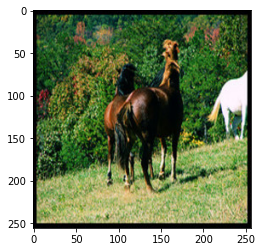

In [4]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
def plotImage(tens):
    b, c, h, w = tens.shape
    print(b, c, h, w)
    img = tens.reshape((c, h, w))
    img = img.transpose(0, 2)
    img = img.transpose(0, 1)
    print(img)
    print(img.shape)
    plt.imshow(img)
img = mpimg.imread('./datasets/horse2zebra/testA/n02381460_1000.jpg')
plt.imshow(img)

In [5]:
opt = Namespace(CUT_mode='CUT', batch_size=1, checkpoints_dir='./checkpoints', crop_size=256, dataroot='./datasets/horse2zebra', dataset_mode='unaligned', direction='AtoB', display_id=-1, display_winsize=256, easy_label='experiment_name', epoch='latest', eval=False, flip_equivariance=False, gpu_ids=gpu_ids, init_gain=0.02, init_type='xavier', input_nc=3, isTrain=False, lambda_GAN=1.0, lambda_NCE=1.0, load_size=256, max_dataset_size=10000, model='cut', n_layers_D=3, name='horse2zebra_cut_pretrained', nce_T=0.07, nce_idt=True, nce_includes_all_negatives_from_minibatch=False, nce_layers='0,4,8,12,16', ndf=64, netD='basic', netF='mlp_sample', netF_nc=256, netG='resnet_9blocks', ngf=64, no_antialias=False, no_antialias_up=False, no_dropout=True, no_flip=True, normD='instance', normG='instance', num_patches=256, num_test=50, num_threads=0, output_nc=3, phase='test', pool_size=0, preprocess='resize_and_crop', random_scale_max=3.0, results_dir='./results/', serial_batches=True, stylegan2_G_num_downsampling=1, suffix='', verbose=False)
opt.num_threads = 0   # test code only supports num_threads = 1
opt.batch_size = 1    # test code only supports batch_size = 1
opt.serial_batches = True  # disable data shuffling; comment this line if results on randomly chosen images are needed.
opt.no_flip = True    # no flip; comment this line if results on flipped images are needed.
opt.display_id = -1   # no visdom display; the test code saves the results to a HTML file.
dataset = create_dataset(opt)  # create a dataset given opt.dataset_mode and other options
model = create_model(opt) 


for i, data in enumerate(dataset):
    if i == 0:
        model.data_dependent_initialize(data)
        model.setup(opt)  # regular setup: load and print networks; create schedulers
        model.parallelize()
        if opt.eval:
            model.eval()
    if i >= opt.num_test:  # only apply our model to opt.num_test images.
        break
    print("Input shape", data["A"].shape)
    plotImage(data["A"])
    testInp = torch.zeros((1, 3, 256, 256))
    print("zeros", testInp.shape)
    testInp[:, :, 10:26, 0:16] = 255
    data["A"] = testInp
    model.set_input(data)  # unpack data from data loader
    model.test()  # run inference
    print("Encoding", model.embeds.shape)
    embeds = model.embeds.reshape((256, 64 * 64)).T
    print(embeds.shape)
    visuals = model.get_current_visuals()  # get image results
    img_path = model.get_image_paths()  # get image paths
    if i % 5 == 0:  # save images to an HTML file
        print("processing (%04d)-th image... %s" % (i, img_path))
    #     save_images(webpage, visuals, img_path, width=opt.display_winsize)
    break
# webpage.save()  # save the HTML


dataset [UnalignedDataset] was created


AssertionError: 

In [5]:

# plt.plot